In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
#Reading and opening the file with the data
df  = pd.read_csv("Aviation_Data.csv",encoding='latin-1')
df


C:\Users\jnyak\anaconda3\anacondayesss\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
90344,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
90346,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Creating a new column with the total injuries
df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']].fillna(0)
df['Total.Injuries'] = (
    df['Total.Fatal.Injuries'] + 
    df['Total.Serious.Injuries'] + 
    df['Total.Minor.Injuries'] + 
    df['Total.Uninjured'])
df['Number.of.Engines'] = pd.to_numeric(df['Number.of.Engines'], errors='coerce')

In [4]:
#Checking for the information about the data that was opened
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
#Checking the rows and columns of the data
df.shape

(90348, 32)

In [7]:
#Checking the descriptive analysis
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries
count,82805.000000,90348.000000,90348.000000,76956.000000,90348.000000,76956.000000
mean,1.146585,0.555640,0.236607,0.357061,4.890966,5.892510
std,0.446510,5.085584,1.423306,2.235625,26.790427,26.903625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000,576.000000


In [8]:
#Checking for null values within the data
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries      13392
Total.Uninjured               0
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
Total.In

In [9]:
#Checking for the column names 
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Total.Injuries'],
      dtype='object')

In [10]:
#Separating the columns that are relevant i.e filtering the data
accident = df[['Event.Date','Injury.Severity','Aircraft.damage','Aircraft.Category','Make','Model','Amateur.Built','Number.of.Engines','Engine.Type','Purpose.of.flight','Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Total.Injuries','Weather.Condition','Broad.phase.of.flight']].copy()
accident

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Weather.Condition,Broad.phase.of.flight
0,24/10/1948,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,2.0,UNK,Cruise
1,19/07/1962,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,4.0,UNK,Unknown
2,30/08/1974,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,NaN,0.0,NaN,IMC,Cruise
3,19/06/1977,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,2.0,IMC,Cruise
4,02/08/1979,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,NaN,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,26/12/2022,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,1.0,NaN,NaN
90344,26/12/2022,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
90345,26/12/2022,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,1.0,VMC,NaN
90346,26/12/2022,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [11]:
#Changing the data under the make and model columns to upper case
df['Make'] = df['Make'].astype(str).str.upper().str.strip()
df['Model'] = df['Model'].astype(str).str.upper().str.strip()

In [12]:
#Taking data from recent years
accident['Event.Date'] = pd.to_datetime(accident['Event.Date'])
acc_year = accident[accident['Event.Date'].dt.year >= 1993].copy()
acc_year


,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Weather.Condition,Broad.phase.of.flight
32026,1993-01-01,Fatal(1),Destroyed,NaN,Luscombe,8A,No,1.0,Reciprocating,Personal,1.0,0.0,1.0,0.0,2.0,VMC,Approach
32027,1993-01-01,Non-Fatal,Destroyed,NaN,Hughes,269C,No,1.0,Reciprocating,Other Work Use,0.0,1.0,0.0,0.0,1.0,VMC,Maneuvering
32028,1993-01-01,Non-Fatal,Destroyed,NaN,Cessna,152,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,0.0,1.0,VMC,Approach
32029,1993-01-01,Non-Fatal,Substantial,NaN,Piper,PA-32R-301,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,1.0,2.0,VMC,Approach
32030,1993-01-01,Non-Fatal,Substantial,NaN,Cessna,120,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,2.0,VMC,Takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,1.0,NaN,NaN
90344,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
90345,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,1.0,VMC,NaN
90346,2022-12-26,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [13]:
#filtering to get data on airplanes only
acc_plane = acc_year[acc_year['Aircraft.Category'] == "Airplane"]
acc_plane


,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Weather.Condition,Broad.phase.of.flight
32592,1993-04-23,Fatal(2),Destroyed,Airplane,Piper,PA-18-150,No,1.0,Reciprocating,Business,2.0,0.0,NaN,0.0,NaN,VMC,Maneuvering
32993,1993-06-13,Fatal(2),Destroyed,Airplane,"Emory W. Greer, Jr.",VARI-EZE,Yes,1.0,Reciprocating,Personal,2.0,0.0,NaN,0.0,NaN,VMC,Takeoff
33535,1993-08-14,Fatal(1),Destroyed,Airplane,Cessna,182A,No,1.0,Reciprocating,Skydiving,1.0,4.0,NaN,0.0,NaN,VMC,Takeoff
33580,1993-08-18,Non-Fatal,Destroyed,Airplane,Piper,PA-34-220,No,1.0,Reciprocating,Ferry,0.0,0.0,NaN,1.0,NaN,VMC,Cruise
33588,1993-08-20,Fatal(2),Destroyed,Airplane,Glasair,SH-2F,Yes,1.0,Reciprocating,Personal,2.0,0.0,NaN,0.0,NaN,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,2022-12-13,Non-Fatal,Substantial,Airplane,PIPER,PA42,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,NaN,NaN
90332,2022-12-14,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,1.0,VMC,NaN
90335,2022-12-15,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,NaN,NaN
90336,2022-12-16,Minor,Substantial,Airplane,CESSNA,R172K,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,1.0,VMC,NaN


In [14]:
#Removing the airplanes with an amateur built
acc_pro = acc_plane[acc_plane['Amateur.Built'] != "Yes"]
acc_pro

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Weather.Condition,Broad.phase.of.flight
32592,1993-04-23,Fatal(2),Destroyed,Airplane,Piper,PA-18-150,No,1.0,Reciprocating,Business,2.0,0.0,NaN,0.0,NaN,VMC,Maneuvering
33535,1993-08-14,Fatal(1),Destroyed,Airplane,Cessna,182A,No,1.0,Reciprocating,Skydiving,1.0,4.0,NaN,0.0,NaN,VMC,Takeoff
33580,1993-08-18,Non-Fatal,Destroyed,Airplane,Piper,PA-34-220,No,1.0,Reciprocating,Ferry,0.0,0.0,NaN,1.0,NaN,VMC,Cruise
33711,1993-04-09,Fatal(1),Minor,Airplane,Beech,C-45H,No,2.0,Reciprocating,Skydiving,1.0,0.0,NaN,10.0,NaN,VMC,Cruise
33880,1993-09-25,Non-Fatal,Substantial,Airplane,Cessna,172,No,1.0,Reciprocating,Aerial Observation,0.0,0.0,NaN,2.0,NaN,VMC,Takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,2022-12-13,Non-Fatal,Substantial,Airplane,PIPER,PA42,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,NaN,NaN
90332,2022-12-14,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,1.0,VMC,NaN
90335,2022-12-15,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,NaN,NaN
90336,2022-12-16,Minor,Substantial,Airplane,CESSNA,R172K,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,1.0,VMC,NaN


In [15]:
#Removing rows where the total inuries are 0
survive_df = acc_pro[acc_pro['Total.Injuries'] >0].copy()
model_stats = survive_df.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Injuries': 'sum',
    'Event.Date': 'count' 
}).rename(columns={'Event.Date': 'Accident_Count'})
#Determining the fatality rate
model_stats['Fatality_Rate'] = model_stats['Total.Fatal.Injuries'] / model_stats['Total.Injuries']
#Using the aircrafts with the lowest fatality rate and with more than 50 accidents 
reliable_models = model_stats[model_stats['Accident_Count'] >= 50].copy()
safest_models = reliable_models.sort_values(by='Fatality_Rate', ascending=True)

safest_models.head(10)

Total.Fatal.Injuries  Total.Injuries  Accident_Count  \
Make   Model                                                             
Piper  PA18                        2.0            72.0              51   
Cessna 180                         3.0           107.0              58   
       152                         2.0            63.0              52   
CESSNA 180                        12.0           230.0             127   
       172P                       11.0           204.0              90   
PIPER  PA-18-150                  11.0           191.0             134   
CESSNA 170B                       10.0           150.0              80   
BOEING 737                      1341.0         18942.0             176   
PIPER  PA 18-150                   8.0            88.0              57   
       PA-28-161                  10.0           107.0              62   

                  Fatality_Rate  
Make   Model                     
Piper  PA18            0.027778  
Cessna 180             0.028037  
       152             0.031746  
CESSNA 180             0.052174  
       172P            0.053922  
PIPER  PA-18-150       0.057592  
CESSNA 170B            0.066667  
BOEING 737             0.070795  
PIPER  PA 18-150       0.090909  
       PA-28-161       0.093458

In [16]:
#filtering the data by number of engines and grouping
engine_analysis = acc_pro[(acc_pro['Number.of.Engines'] > 0) & (acc_pro['Number.of.Engines'] <= 4)].copy()
engine_stats = engine_analysis.groupby('Number.of.Engines').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Injuries': 'sum',
    'Event.Date': 'count'
}).rename(columns={'Event.Date': 'Accident_Count'})

In [17]:
# Calculate Fatality Rate using number of engines and getting the survivability probability
engine_stats['Fatality_Rate'] = engine_stats['Total.Fatal.Injuries'] / engine_stats['Total.Injuries']
engine_stats['Survival_Probability'] = (1 - engine_stats['Fatality_Rate']) * 100

print(engine_stats.sort_values(by='Number.of.Engines'))

                   Total.Fatal.Injuries  Total.Injuries  Accident_Count  \
Number.of.Engines                                                         
1.0                              4224.0         24590.0           15691   
2.0                              3305.0         81073.0            2987   
3.0                               171.0           946.0              34   
4.0                               265.0          4829.0              89   

                   Fatality_Rate  Survival_Probability  
Number.of.Engines                                       
1.0                     0.171777             82.822285  
2.0                     0.040766             95.923427  
3.0                     0.180761             81.923890  
4.0                     0.054877             94.512321  


In [18]:
final_rec = acc_pro[acc_pro['Number.of.Engines'] == 2.0].copy()

# Grouping by Make and Model
model_stats = final_rec.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Injuries': 'sum',
    'Event.Date': 'count'
}).rename(columns={'Event.Date': 'Accident_Count'})

#Calculating Survival Rate
model_stats = model_stats[model_stats['Total.Injuries'] > 0]
model_stats['Survival_Rate'] = (1 - (model_stats['Total.Fatal.Injuries'] / model_stats['Total.Injuries'])) * 100

#Filtering the final models from 15 accidents to get our final list
final_report = model_stats[model_stats['Accident_Count'] >= 15].sort_values(by='Survival_Rate', ascending=False)

print("--- FINAL SAFETY RECOMMENDATIONS (TWIN-ENGINE) ---")
print(final_report.head(15))

--- FINAL SAFETY RECOMMENDATIONS (TWIN-ENGINE) ---
                            Total.Fatal.Injuries  Total.Injuries  \
Make           Model                                               
BOMBARDIER INC CL-600-2B19                   0.0           639.0   
CESSNA         402C                          0.0            76.0   
Boeing         737                           0.0          3051.0   
BOEING         777                           0.0          1803.0   
               767                           0.0          2921.0   
               737 7H4                       1.0          1853.0   
AIRBUS         A320                          7.0          1186.0   
BOEING         737                         383.0          5976.0   
CESSNA         560XL                         7.0            82.0   
BEECH          76                            3.0            35.0   
CESSNA         550                           6.0            57.0   
BEECH          200                           8.0            72.0 

In [20]:
df.to_csv('Aviation_Data_For_Tableau.csv', index=False)

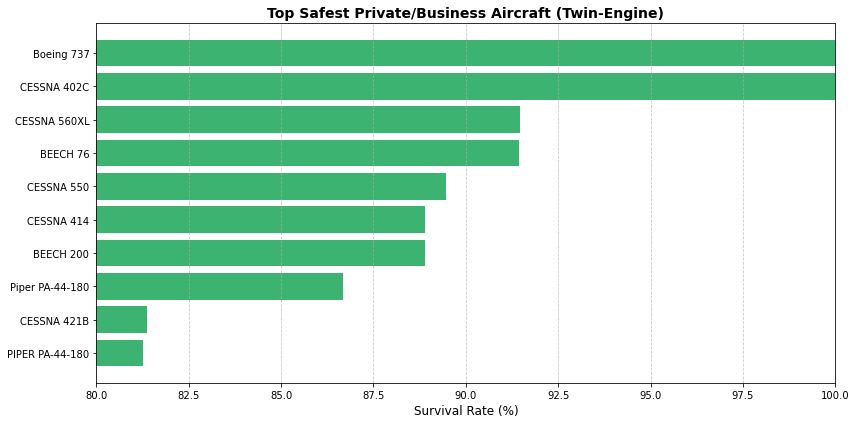

In [21]:
#
commercial_makes = ['BOEING', 'AIRBUS', 'EMBRAER', 'BOMBARDIER INC']
business_jet_report = final_report[~final_report.index.get_level_values('Make').isin(commercial_makes)].copy()

plt.figure(figsize=(12, 6))
top_business_models = business_jet_report.head(10).sort_values(by='Survival_Rate', ascending=True)
bars = plt.barh(
    [f"{make} {model}" for make, model in top_business_models.index], 
    top_business_models['Survival_Rate'], 
    color='mediumseagreen'
)
plt.xlabel('Survival Rate (%)', fontsize=12)
plt.title('Top Safest Private/Business Aircraft (Twin-Engine)', fontsize=14, fontweight='bold')
plt.xlim(80, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()